# Assignment II: _Belief in Supernatural Evil and Guns_<br>
In this assignment we will replicate a study of belief in supernatural evil and attitudes towards guns in the United States. 
The study is:

>Christopher G. Ellison, Benjamin Dowd-Arrow, Amy M. Burdette, Pablo E. Gonzalez, Margaret S. Kelley, Paul Froese<br /> 
"**Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States**"<br />
>Social Science Research, Volume 99, 2021, https://doi.org/10.1016/j.ssresearch.2021.102595.

---


 ![](https://upload.wikimedia.org/wikipedia/commons/e/ee/Gun_outline.svg)
 

---
 >Panagiotis Giannopoulos, P3352102 <br />
 >MSc in Data Science <br />
 >Athens University of Economics and Business <br />
 pgiannopoulos@aueb.gr

## Part 1: Belief in Supernatural Evil Metric
---
From the study, we expect that belief in supernatural evil will be associated with more liberal gun policy attitudes. First, we expect that belief in supernatural evil will be associated with more liberal gun policy attitudes. Second, given the associations between supernatural evil belief and political ideology  and the increasing politicization of firearms policy issues, we expect that the associations described above will be partly mediated by political ideology. <br>

In order to measure the belief in supernatural evil, we will use the answers to three questions asked by the participants in the survey:

* Whether the respondent believes in the devil.

* Whether the respondent believes in hell.

* Whether the respondent believes in demons.

Then, we will test if we can combine the answers to these three questions to a single metric (*Supernatural Evil*). 

---

In [1]:
import pandas as pd 
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation

To test these hypotheses, we use data from **Wave Four of the Baylor Religion Survey (BRS)**, which was conducted in January of 2014. Briefly, the BRS is a national random sample of 1572 non-institutionalized respondents ages 18 and over who reside in the continental United States.

In [2]:
data = pd.read_excel('data/Baylor Religion Survey, Wave IV (2014).XLSX') #Import the data
data_sne = data[['Q23A','Q23C','Q23G']]  #Keep the three metrics answers
data_sne.columns = ['Devil','Hell','Demon']

### Single Metric (*test & creation*) 

We will use the **Principal Component Analysis (PCA)** to reduce the dimensionality of our dataset (*Devil, Hell, Demon*) into one dimension. Then we will check how much information (variance) contains our new single metric.

In [3]:
from sklearn.decomposition import PCA

# PCA
data_sne_d = data_sne.dropna() 
pca = PCA(n_components=1, svd_solver='full') 
pca.fit(data_sne_d) 
print("Explained variance ratio:", "{:.2f}".format(pca.explained_variance_ratio_[0]),'\n')

# Create the index
data['Supernatural_Evil'] = data_sne[['Devil','Hell','Demon']].mean(axis=1) 
data_sne = data[['Supernatural_Evil']] 
print('The new index mean is:', "{:.2f}".format(data['Supernatural_Evil'].mean())) 

Explained variance ratio: 0.90 

The new index mean is: 3.09


### Conclusion

As we see from the results the new index (*Superntaural Evil*) can be combined from the three questions and keep the ***90%*** of the information. The new index ranges from 1 to 4 with a mean of *3.08*, indicating significant levels of overall belief in supernatural evil among the BRS respondents.

## Part 2: Variables Selection
---
Apart from the belief in supernatural evil metric, we will use several other variables to control our estimates. We will derive descriptive statitistics in them. 
<br>Firstly, we will select and prepare the dependent variables and secondly the independent ones.

### Dependent Variables
  * Ban on Semi-Auto Guns
  * Ban on High-Capacity Ammo Clips 
  * Banning Civilian Handguns
  * Support for Concealed Carry Laws 
  * More Armed Security at Schools 
  * More Teachers/Faculty having Guns 
  * More Gun Safety Programs 
  * Expanded Mental Health Screening


In [4]:
#### Dependent Variables ####
data_d = data[['Q73A','Q73E','Q73G','Q73H','Q73C','Q73F','Q73B','Q73D']] #Data Selection
data_d.columns = ['Semi_Auto_Guns','High_Capacity_Ammo_Clips','Civilian_Handguns','Concealed_Carry_Laws',\
                  'Armed_Security','Teachers_Guns','Gun_Safety_Programm','Mental_Health_Screening']
data_d = data_d.replace(2.0,0) #Data preparation
print('=' * 28,'Dependent Variables','=' * 28)
print(data_d.describe().T)
print('='*78)

============================ Dependent Variables ============================
                           count      mean       std  min  25%  50%  75%  max
Semi_Auto_Guns            1502.0  0.629161  0.483190  0.0  0.0  1.0  1.0  1.0
High_Capacity_Ammo_Clips  1502.0  0.671105  0.469968  0.0  0.0  1.0  1.0  1.0
Civilian_Handguns         1501.0  0.290473  0.454132  0.0  0.0  0.0  1.0  1.0
Concealed_Carry_Laws      1502.0  0.557923  0.496799  0.0  0.0  1.0  1.0  1.0
Armed_Security            1510.0  0.621854  0.485085  0.0  0.0  1.0  1.0  1.0
Teachers_Guns             1504.0  0.294548  0.455991  0.0  0.0  0.0  1.0  1.0
Gun_Safety_Programm       1515.0  0.927393  0.259576  0.0  1.0  1.0  1.0  1.0
Mental_Health_Screening   1512.0  0.908069  0.289024  0.0  1.0  1.0  1.0  1.0


### Independent Variables (*Part 1*)
   * Religious Variables
     * Attendance
     * Bible (Human Error, History and Fables) 
     * Biblical Inerrancy
     * Biblical Literalism
   * Religious Affiliation
     * Conservative Protestant 
     * Mainline Protestant 
     * Black Protestant 
     * Catholic
     * Other
     * No Affiliation

In [5]:
#### Independent Variables (Part 1) #####

#Religious Variables
data_rv = data[['Q4','Q17','Q17','Q17']] #Data Selection
data_rv.columns = ['Attendance','Bible','Biblical_Inerrancy','Biblical_Literalism']
s1 = data_rv.Bible.replace([1,2,3,4,8],[0,0,1,1,1])
s2 = data_rv.Biblical_Inerrancy.replace([1,2,3,4,8],[0,1,0,0,0])
s3 = data_rv.Biblical_Literalism.replace([1,2,3,4,8],[1,0,0,0,0])
data_rv = pd.concat([data_rv.Attendance,s1,s2,s3], axis=1)
print('=' * 27,'Religious Variables','=' * 25)
print(data_rv.describe().T)
print('='*73,'\n')

#Religious Affiliation 
data_ra = data[['RELTRAD','RELTRAD','RELTRAD','RELTRAD','RELTRAD','RELTRAD']] #Data Selection
data_ra.columns = ['Conservative_Protestant','Mainline_Protestant','Black_Protestant',\
                   'Catholic','Other_Religion','No_Affiliation']
s1 = data_ra.Conservative_Protestant.replace([1,2,3,4,5,6,7],[1,0,0,0,0,0,0])
s2 = data_ra.Mainline_Protestant.replace([1,2,3,4,5,6,7],[0,1,0,0,0,0,0])
s3 = data_ra.Black_Protestant.replace([1,2,3,4,5,6,7],[0,0,1,0,0,0,0])
s4 = data_ra.Catholic.replace([1,2,3,4,5,6,7],[0,0,0,1,0,0,0])
s5 = data_ra.Other_Religion.replace([1,2,3,4,5,6,7],[0,0,0,0,1,1,0])
s6 = data_ra.No_Affiliation.replace([1,2,3,4,5,6,7],[0,0,0,0,0,0,1])
data_ra = pd.concat([s1,s2,s3,s4,s5,s6], axis=1)
print('=' * 26,'Religious Affiliation','=' * 27)
print(data_ra.describe().T)
print('='*77)

=========================== Religious Variables =========================
                      count      mean       std  min  25%  50%  75%  max
Attendance           1556.0  3.676735  2.932510  0.0  1.0  3.0  7.0  8.0
Bible                1549.0  0.432537  0.495588  0.0  0.0  0.0  1.0  1.0
Biblical_Inerrancy   1549.0  0.338283  0.473278  0.0  0.0  0.0  1.0  1.0
Biblical_Literalism  1549.0  0.229180  0.420441  0.0  0.0  0.0  0.0  1.0

========================== Religious Affiliation ===========================
                          count      mean       std  min  25%  50%  75%  max
Conservative_Protestant  1481.0  0.284267  0.451217  0.0  0.0  0.0  1.0  1.0
Mainline_Protestant      1481.0  0.168805  0.374706  0.0  0.0  0.0  0.0  1.0
Black_Protestant         1481.0  0.071573  0.257867  0.0  0.0  0.0  0.0  1.0
Catholic                 1481.0  0.249156  0.432670  0.0  0.0  0.0  0.0  1.0
Other_Religion           1481.0  0.081702  0.274002  0.0  0.0  0.0  0.0  1.0
No_Affiliation       

### Independent Variables (*Part 2*)
  * Political Ideology
  * Age
  * Sex
    * Female
    * Male
  * Race
    * White
    * Hispanic
    * African American/Black 
    * Other
  * Education
    * Less Than High School 
    * High School or Equivalent 
    * Some College
    * College Degree 
    * Post-graduate Degree 
  * Household Income
  * Marital Status
    * Not Partnered/Single 
    * Married/Cohabitating
  * Children
    * No kids under 18 in home 
    * Kids under 18 in home
  * Area Demographics
    * Small Town/Rural
    * Urban Area
  * Region
    * South
    * Other Region

In [6]:
#### Independent Variables (Part 2) #####

#Political Ideology
data_med = data[['Q31']]
data_med.columns = ['Political_Ideology']
print('=' * 25,'Political Ideology','=' * 26)
print(data_med.describe().T)
print('='*71,'\n')

#Age 
data_age = data[['AGE']]
data_age.columns = ['Age']
data_age = data_age.loc[(data_age["Age"] >= 19) & (data_age["Age"] <=99)]
print('=' * 29,'Age','=' * 29)
print(data_age.describe().T)
print('='*63,'\n')

#Sex  
data_sex = data[['I_GENDER','I_GENDER']]
data_sex.columns = ['Female','Male']
s2 = data_sex.Male.replace([1,2],[1,0])
s1 = data_sex.Female.replace([1,2],[0,1])
data_sex = pd.concat([s1,s2], axis=1)
print('=' * 27,'Sex','=' * 27)
print(data_sex.describe().T)
print('='*59,'\n')

#Race  
data_r = data[['Q88A','Q89','Q88B','Q88F','Q88D','Q88C','Q88E']]
data_r.columns = ['White','Hispanic','African_American','Other_Race','Asian','American_Indian','Hawain']
data_r = data_r.dropna(how='all')
s1 = data_r.White.replace([1,2,np.nan],[1,0,0])
s2 = data_r.Hispanic.replace([1,2,3,4,5,8,np.nan],[0,1,1,1,1,0,0])
s3 = data_r.African_American.replace([1,2,np.nan],[1,0,0])
s4 = data_r.Other_Race.replace([1,2,np.nan],[1,0,0])
s5 = data_r.Asian.replace([1,2,np.nan],[1,0,0])
s6 = data_r.American_Indian.replace([1,2,np.nan],[1,0,0])
s7 = data_r.Hawain.replace([1,2,np.nan],[1,0,0])
 #White
conditions = [(s1==1) & (s2==1),
              (s1==1) & (s6==1)]
choices = [1,1]
s8 = pd.Series(np.select(conditions, choices), name = "White_Hisp_Indian")
s9 = pd.Series(s1-s8, name = 'White')
 #Other_Race
s10 = pd.Series(np.where((s4==1)|(s6==1), 1,0), name = 'Other_Race')
data_r = pd.concat([s9,s2,s3,s10], axis=1)
print('=' * 31,'Race','=' * 32)
print(data_r.describe().T)
print('='*69,'\n')

#Education  
data_ed = data[['Q90','Q90','Q90','Q90','Q90']]
data_ed.columns = ['Less_High_School','High_School','Some_College','College','Post_Graduate']
s1 = data_ed.Less_High_School.replace([1,2,3,4,5,6,7],[1,1,0,0,0,0,0])
s2 = data_ed.High_School.replace([1,2,3,4,5,6,7],[0,0,1,0,0,0,0])
s3 = data_ed.Some_College.replace([1,2,3,4,5,6,7],[0,0,0,1,1,0,0])
s4 = data_ed.College.replace([1,2,3,4,5,6,7],[0,0,0,0,0,1,0])
s5 = data_ed.Post_Graduate.replace([1,2,3,4,5,6,7],[0,0,0,0,0,0,1])
data_ed = pd.concat([s1,s2,s3,s4,s5], axis=1)
print('=' * 29,'Education','=' * 29)
print(data_ed.describe().T)
print('='*70,'\n')

#Household Income  
data_hi = data[['Q95']]
data_hi.columns = ['Household_Income']
print('=' * 26,'Household Income','=' * 25)
print(data_hi.describe().T)
print('='*69,'\n')

#Marital Status 
data_ms = data[['I_MARITAL','I_MARITAL']]
data_ms.columns = ['Single','Married']
s1 = data_ms.Single.replace([1,2,3,4],[1,0,1,1])
s2 = data_ms.Married.replace([1,2,3,4],[0,1,0,0])
data_ms = pd.concat([s1,s2], axis=1)
print('=' * 22,'Marital Status','=' * 22)
print(data_ms.describe().T)
print('='*60,'\n')

#Children  
data_ch = data[['Q93','Q93']]
data_ch.columns = ['No_kids_at_home','Kids_at_home']
s2 = data_ch.Kids_at_home.replace([1,2,3,4,5,6,0],[0,0,0,0,0,0,1])
s1 = data_ch.No_kids_at_home.replace([1,2,3,4,5,6,0],[1,1,1,1,1,1,0])
data_ch = pd.concat([s1,s2], axis=1)
print('=' * 28,'Children','=' * 29)
print(data_ch.describe().T)
print('='*67,'\n')

#Area demographics 
data_ad = data[['Q80','Q80']]
data_ad.columns = ['Small_Town','Urban_Area']
s1 = data_ad.Small_Town.replace([1,2,3,4,8],[0,0,1,1,np.nan])
s2 = data_ad.Urban_Area.replace([1,2,3,4,8],[1,1,0,0,np.nan])
data_ad = pd.concat([s1,s2], axis=1)
print('=' * 21,'Area Demographics','=' * 21)
print(data_ad.describe().T)
print('='*61,'\n')

#Region 
data_re = data[['STATE','STATE']]
data_re.columns = ['South','Other_Region']

s1 = data_re.South.replace(['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV',\
                       'AK','AZ', 'CA','CO','CT','HI','ID','IL','IN','IA','KS','ME','MA','MI','MN','MO','MT',\
                       'NE','NV','NH','NJ','NM','NY','ND','OH','OR','PA','RI','SD','UT','VT','WA','WI','WY',],\
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
                       0,0,0,0,0,0,0,0])
s2 = data_re.Other_Region.replace(['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV',\
                       'AK','AZ', 'CA','CO','CT','HI','ID','IL','IN','IA','KS','ME','MA','MI','MN','MO','MT',\
                       'NE','NV','NH','NJ','NM','NY','ND','OH','OR','PA','RI','SD','UT','VT','WA','WI','WY',],\
                       [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
                       1,1,1,1,1,1,1,1])
data_re = pd.concat([s1,s2], axis=1)
print('=' * 29,'Region','=' * 28)
print(data_re.describe().T)
print('='*65,'\n')

========================= Political Ideology ==========================
                     count      mean       std  min  25%  50%  75%  max
Political_Ideology  1521.0  3.800789  1.554416  1.0  2.0  4.0  5.0  7.0

============================= Age =============================
      count       mean        std   min   25%   50%   75%   max
Age  1468.0  52.645095  17.018217  19.0  38.0  54.0  65.0  99.0

=========================== Sex ===========================
         count      mean       std  min  25%  50%  75%  max
Female  1536.0  0.578776  0.493916  0.0  0.0  1.0  1.0  1.0
Male    1536.0  0.421224  0.493916  0.0  0.0  0.0  1.0  1.0

=============================== Race ================================
                   count      mean       std  min  25%  50%  75%  max
White             1421.0  0.729064  0.476704 -1.0  0.0  1.0  1.0  1.0
Hispanic          1495.0  0.117057  0.321596  0.0  0.0  0.0  0.0  1.0
African_American  1495.0  0.119732  0.324757  0.0  0.0  0.0  0.0  1.0

## Part 3: Predict Support for Various Gun Policies
---
In this part, we will proceed to predict support for various gun policies from the metric of supernatural evil, controlling for background variables. The gun policies are our dependent variables from *Part 2*. 

Gun policies:

* Semi-Auto Weapons Ban

* High-Capacity Magazine Ban

* Cilivian Hand Gun Possession Ban

* Support for Concealed Carry

* More Armed Security at Schools

* More Teachers / Faculty with Guns

* Required Gun Safety Programs

* Expanded Mental Health Screening

For each gun-related policy outcome we estimate two models: (a) one model that includes all religious predictors; and (b) a second model, adding all the covariates and political Ideology to the initial model.

Finally, the research was reported in ***The Economist***, on November 6, 2021, under the title "Belief in supernatural evil is a strong predictor of pro-gun beliefs" (United States section), available at https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs. We will compare the reporting with the findings in our research.

### Data Preparation

* Combine the dataframes from independent variables
* Drop the no needed columns for our analysis
* Impute missing values via ***Multiple Imputation***
* Create a dataset for each gun policy 

In [7]:
# Combine the dataframes from independent variables
data_frames = [data_sne, data_rv, data_ra, data_med, data_age, data_sex, data_r,\
               data_ed, data_hi, data_ms, data_ch, data_ad, data_re]
df_ind_na = pd.concat(data_frames,axis=1)

# Drop no needed columns (Independant Variables)
df_ind_na = df_ind_na.drop(['Bible','No_Affiliation','Male','White','High_School','Single','No_kids_at_home',\
                    'Other_Region','Small_Town'],axis=1)

In [8]:
# Multiple imputation via Iterative Imputer (Independent Variables dataframe)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 20, random_state = 5, imputation_order = 'roman')
df_ind = pd.DataFrame(np.round(imputer.fit_transform(df_ind_na)), columns = list(df_ind_na.columns))

In [9]:
# Combine dataframe of Independent Variables with Dependent
df = pd.concat([data_d,df_ind],axis=1)

# Create a dataset for each gun policy // drop N/A values from dependent variables
df1 = df.dropna(subset = ['Semi_Auto_Guns'])
df2 = df.dropna(subset = ['High_Capacity_Ammo_Clips'])
df3 = df.dropna(subset = ['Civilian_Handguns'])
df4 = df.dropna(subset = ['Concealed_Carry_Laws'])
df5 = df.dropna(subset = ['Armed_Security'])
df6 = df.dropna(subset = ['Teachers_Guns'])
df7 = df.dropna(subset = ['Gun_Safety_Programm'])
df8 = df.dropna(subset = ['Mental_Health_Screening'])

#Create the two models parameters
all_columns = list(df.columns) 
d_var = all_columns[0:8]
model_1 = all_columns[8:17]
model_2 = all_columns[8:32]
df_all = (df1,df2,df3,df4,df5,df6,df7,df8)

### Logistic Regression 

We will use Logistic Regression to estimate predicting support for the gun policies by supernatural evil presented in odds ratios. 

#### Model 1



In [10]:
from statsmodels.formula.api import logit

#Logistic Regression 
df_est=[]
i = 0
for gun_pol in list(d_var):
    formula1 = gun_pol + " ~ " + '+'.join(model_1)
    data1 = df_all[i]
    mod1 = logit(formula = formula1, data = data1).fit(disp=False)
    coef1 = np.exp(mod1.params)
    pval1 = mod1.pvalues
    df_est.append(coef1)
    df_est.append(pval1)
    i=i+1

#Results dataframe creation
df10 = pd.concat([df_est[0],df_est[1]], axis=1)
df10.columns = ['Coefficient','p_value']
df20 = pd.concat([df_est[2],df_est[3]], axis=1)
df20.columns = ['Coefficient','p_value']
df30 = pd.concat([df_est[4],df_est[5]], axis=1)
df30.columns = ['Coefficient','p_value']
df40 = pd.concat([df_est[6],df_est[7]], axis=1)
df40.columns = ['Coefficient','p_value']
df50 = pd.concat([df_est[8],df_est[9]], axis=1)
df50.columns = ['Coefficient','p_value']
df60 = pd.concat([df_est[10],df_est[11]], axis=1)
df60.columns = ['Coefficient','p_value']
df70 = pd.concat([df_est[12],df_est[13]], axis=1)
df70.columns = ['Coefficient','p_value']
df80 = pd.concat([df_est[14],df_est[15]], axis=1)
df80.columns = ['Coefficient','p_value']

d1 = {'Semi_Auto_Guns':df10, 'High_Capacity_Ammo_Clips':df20,'Civilian_Handguns':df30,'Concealed_Carry_Laws':df40,\
     'Armed_Security':df50,'Teachers_Guns':df60,'Gun_Safety_Programm':df70,'Mental_Health_Screening':df80}

df_model1 = pd.concat(d1.values() , axis=1, keys=d1.keys())
df_model1.drop(index=df_model1.index[0], axis=0, inplace=True)
df_model1.style.format('{:.3f}').applymap(lambda x: f"color: {'brown' if x>0 and x<=0.001 else 'black'}")

#### Results

As mentioned above the coefficients are represent in odd ratios (OR). Also we respresent the p-values of each independent variable and highlight the ones that are statistically significant (***p ≤ 0.001***). On this model We will focus primarly on supernatural evil metric as it is statistically significant in most of results.

Having consider only the *religious predictors* in this model, we see that each-one unit increment in the strenght of one's belief in supernatural evil is associated with *27%* decline in support for *banning semi-automatic weapons* (***OR = 0.73***). A similar pattern occurs in the opinion from *ban high capacity ammunition magazines* (***OR = 0.75***) and *civilian ownership of handguns* (***OR = 0.68***). 

Supernatural evil beliefs are posivitely associated with approval of laws allowing *concealed carry of handguns* (***OR = 1.5***), *the placement of more police and security in schools* (***OR = 1.55***), *arming teachers* (***OR = 1.41***).

We will consider neglible the association between the belief in supernatural evil and the *support for more gun safety programms* (***OR = 0.89***) and the *better mental health screening* of gun buyers (***OR = 0.74***) due to the high p-values.



#### Model 2

In [11]:
#Logistic Regression 
df_est=[]
i = 0
for gun_pol in list(d_var):
    formula2 = gun_pol + " ~ " + '+'.join(model_2)
    data2 = df_all[i]
    mod2 = logit(formula = formula2, data = data2).fit(disp=False)
    coef2 = np.exp(mod2.params)
    pval2 = mod2.pvalues
    df_est.append(coef2)
    df_est.append(pval2)
    i=i+1
    
#Results dataframe
df11 = pd.concat([df_est[0],df_est[1]], axis=1)
df11.columns = ['Coefficient','p_value']
df22 = pd.concat([df_est[2],df_est[3]], axis=1)
df22.columns = ['Coefficient','p_value']
df33 = pd.concat([df_est[4],df_est[5]], axis=1)
df33.columns = ['Coefficient','p_value']
df44 = pd.concat([df_est[6],df_est[7]], axis=1)
df44.columns = ['Coefficient','p_value']
df55 = pd.concat([df_est[8],df_est[9]], axis=1)
df55.columns = ['Coefficient','p_value']
df66 = pd.concat([df_est[10],df_est[11]], axis=1)
df66.columns = ['Coefficient','p_value']
df77 = pd.concat([df_est[12],df_est[13]], axis=1)
df77.columns = ['Coefficient','p_value']
df88 = pd.concat([df_est[14],df_est[15]], axis=1)
df88.columns = ['Coefficient','p_value']

d2 = {'Semi_Auto_Guns':df11, 'High_Capacity_Ammo_Clips':df22,'Civilian_Handguns':df33,'Concealed_Carry_Laws':df44,\
     'Armed_Security':df55,'Teachers_Guns':df66,'Gun_Safety_Programm':df77,'Mental_Health_Screening':df88}

df_model2 = pd.concat(d2.values() , axis=1, keys=d2.keys())
df_model2.drop(index=df_model2.index[0], axis=0, inplace=True)
df_model2.style.format('{:.3f}').applymap(lambda x: f"color: {'brown' if x>0 and x<0.001 else 'black'}")

#### Results

In the second model we add all the covariates plus the political ideology in the first one. Political ideology and sex are the most significant statistically predictors now. So, we will compare how the the belief in supernatural evil affected by the political ideology in the gun policies. 

We see a decline in support for banning *semi-automatic weapons* (***OR 0.73 -> 0.82***), *high-capacity ammunition magazines* (***OR 0.75 -> 0.84***), *civilian ownership of handguns* (***OR 0.68 -> 0.73***), with the effect of political ideology.

On the other hand the approval of *concealed carry of handguns* (***OR 1.5 -> 1.39***), *placing more policy and security at schools* (***OR 1.55 -> 1.33***), *arming teachers* (***OR 1.41 -> 1.30***) is a pattern that persists with adjustments of the political ideology.

As the same from above we will consider neligible the association between the belief in supernatural evil and the *support for more gun safety programms* <br>(***OR = 1.04***) and the *better mental health screening* of gun buyers (***OR = 0.83***) 

### Economist

<code>A recent study by Christopher Ellison, Benjamin Dowd-Arrow, Amy Burdette and three other sociologists delves into an important but overlooked motivating factor that highlights the role of religion. A survey of 1,572 American adults found that, apart from religious denomination or religious conservatism, belief in the devil, demons and hell is a strong predictor of eight pro-gun beliefs, including arming teachers, carrying concealed firearms and bearing high-capacity defensive weapons. A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa.
The analysis, which controls for political ideology and other demographic factors, found that each step up on a four-point scale measuring the strength of belief in supernatural evil correlated with 32% more support for arming teachers, and a 38% rise in backing for carrying concealed weapons. The effect of belief in supernatural evil on support for the right to carry concealed guns was roughly the same as having conservative politics or not possessing a college degree, but smaller than the effect of gender.<code>
    
As we see from our findings and the research paper we don't agree with the last point of view about the support for the right to carry concealed guns. *Supernatural evil beliefs*, *Political ideology* and *Gender* are the most statistically significant predictors.  


## Part 4: Additional Estimations of the Strength of Predictors
---
In addiion to logistic regression, we will run a complementary series of linear regressions to estimate the strength of the various predictors. In this way we will obtain standardized coefficients.

Standardization of the coefficient is usually done to answer the question of which of the independent variables have a greater effect on the dependent variable in a multiple regression analysis where the variables are measured in different units of measurement. The higher the absolute value of the standardized coefficient, the stronger the effect. 

### Linear Regression


In [12]:
import statsmodels.formula.api as smf

#Linear Regression coefficients /// Model 1
df_est=[]
i = 0
for gun_pol in list(d_var):
    formula1_4 = gun_pol + " ~ " + '+'.join(model_1)
    data1_4 = df_all[i]
    mod1_4 = smf.ols(formula = formula1_4, data = data1_4).fit(disp=False)
    coef1_4 = mod1_4.params
    df_est.append(coef1_4)
    df_coef1_4 = pd.concat(df_est, axis=1)
    i=i+1
df_coef1_4.drop(labels = ['Intercept'], inplace = True)
df_coef1_4.columns=list(d_var)

#Linear Regression coefficients /// Model 2
df_est=[]
i = 0
for gun_pol in list(d_var):
    formula2_4 = gun_pol + " ~ " + '+'.join(model_2)
    data2_4 = df_all[i]
    mod2_4 = smf.ols(formula = formula2_4, data = data2_4).fit(disp=False)
    coef2_4 = mod2_4.params
    df_est.append(coef2_4)
    df_coef2_4 = pd.concat(df_est, axis=1)
    i=i+1
df_coef2_4.drop(labels = ['Intercept'], inplace = True)
df_coef2_4.columns=list(d_var)

### Standard Coefficients
To calculate the standar coefficients we will take the standard deviation of the predictor variable, divide by the standard deviation of the response (Dependent Variable) and multiply by the regression coefficient for the predictor under consideration.

#### Model 1


In [13]:
# Standar Deviation of Dependent Variables
df_sd_d=[]
i = 0
for gun_pol in list(d_var):
    data = df_all[i]
    sd_d = data[gun_pol].std()
    df_sd_d.append(sd_d)
    i=i+1

# Standar Deviation of Independent Variables /// Model 1
df_est=[]
i = 0
for gun_pol in list(d_var):
    data = df_all[i]
    sd_ind = data.std().loc['Supernatural_Evil':'Other_Religion']
    df_est.append(sd_ind)
    df_sd_i = pd.concat(df_est, axis=1)
    i=i+1
df_sd_i.columns=list(d_var)
df_sd_i

# Standar Coefficients /// Model 1
sc1 = df_sd_i.mul(df_coef1_4)
sc_1 = sc1.div(df_sd_d,axis=1)
sc_1.abs().style.format('{:.3f}').highlight_max(color = 'coral', axis = 0)

,Semi_Auto_Guns,High_Capacity_Ammo_Clips,Civilian_Handguns,Concealed_Carry_Laws,Armed_Security,Teachers_Guns,Gun_Safety_Programm,Mental_Health_Screening
Supernatural_Evil,0.151,0.137,0.190,0.212,0.226,0.156,0.030,0.078
Attendance,0.054,0.045,0.061,0.022,0.103,0.057,0.033,0.009
Biblical_Inerrancy,0.006,0.003,0.010,0.061,0.054,0.026,0.021,0.027
Biblical_Literalism,0.003,0.017,0.053,0.009,0.147,0.014,0.015,0.000
Conservative_Protestant,0.004,0.013,0.038,0.002,0.033,0.070,0.008,0.052
Mainline_Protestant,0.037,0.038,0.037,0.005,0.042,0.002,0.014,0.026
Black_Protestant,0.071,0.084,0.119,0.102,0.037,0.058,0.009,0.040
Catholic,0.063,0.068,0.074,0.093,0.038,0.038,0.033,0.054
Other_Religion,0.077,0.070,0.074,0.072,0.020,0.025,0.017,0.026


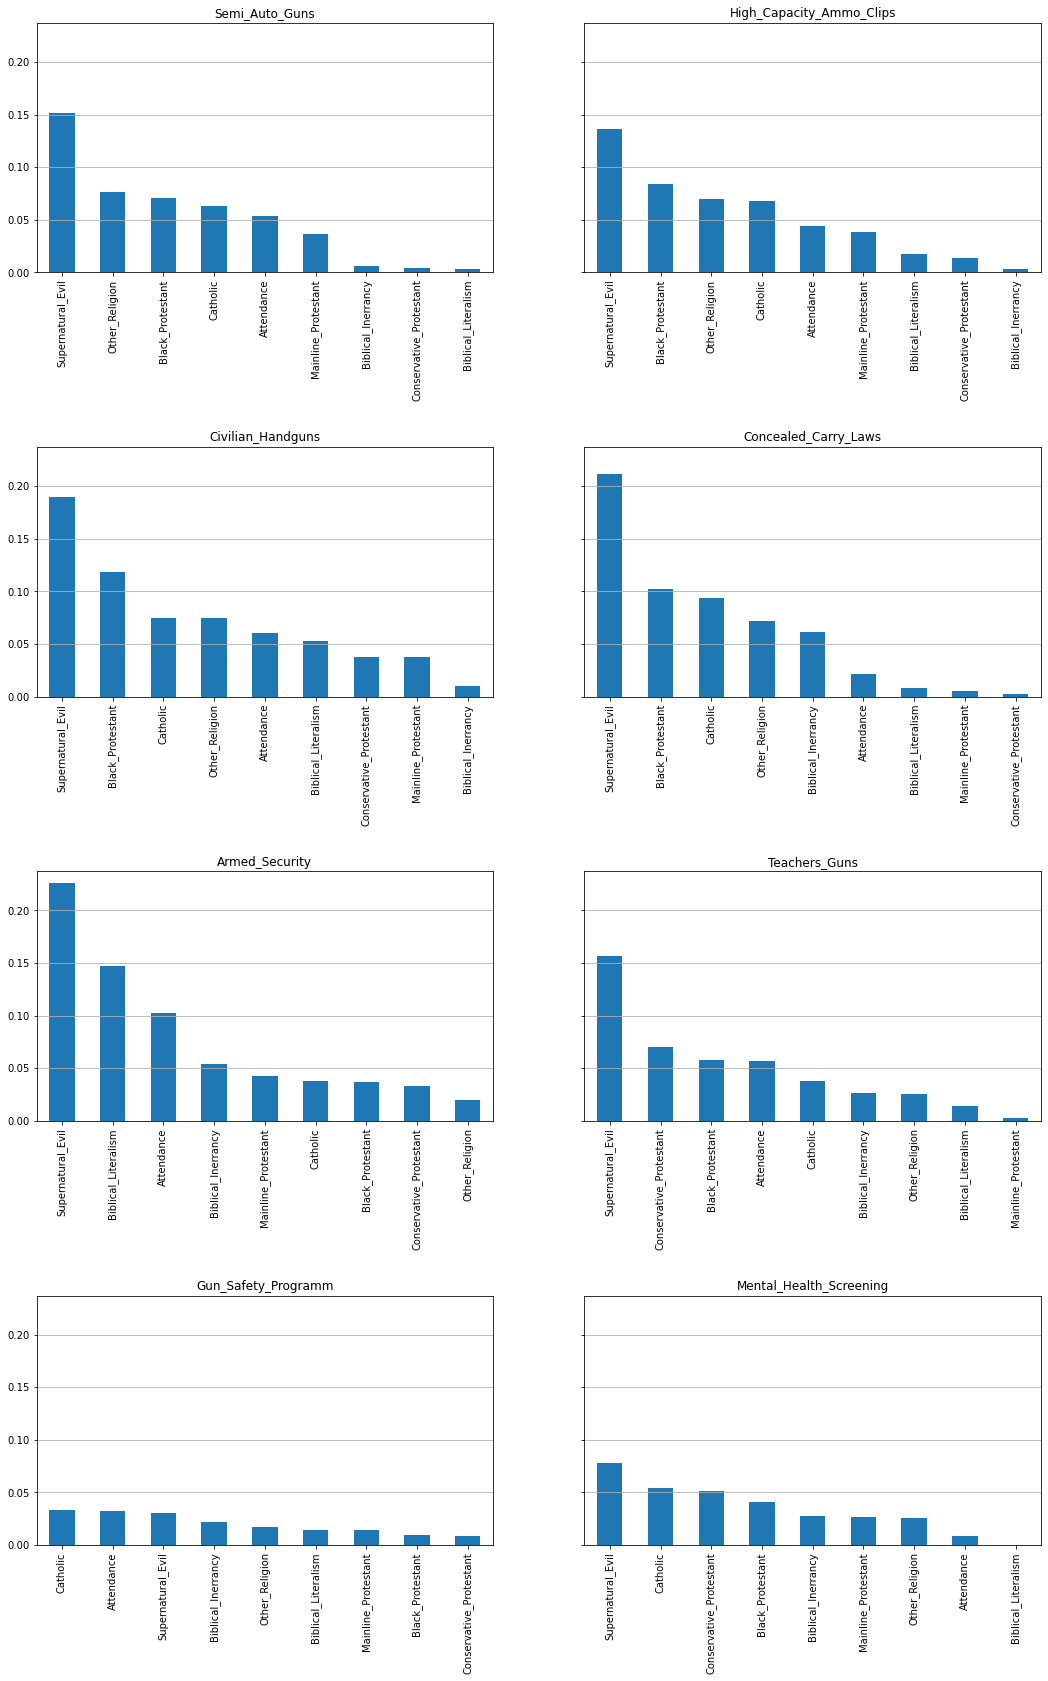

In [14]:
# Plotting // Model 1

sc1 = sc_1.abs().Semi_Auto_Guns.sort_values(ascending=False)
sc2 = sc_1.abs().High_Capacity_Ammo_Clips.sort_values(ascending=False)
sc3 = sc_1.abs().Civilian_Handguns.sort_values(ascending=False)
sc4 = sc_1.abs().Concealed_Carry_Laws.sort_values(ascending=False)
sc5 = sc_1.abs().Armed_Security.sort_values(ascending=False)
sc6 = sc_1.abs().Teachers_Guns.sort_values(ascending=False)
sc7 = sc_1.abs().Gun_Safety_Programm.sort_values(ascending=False)
sc8 = sc_1.abs().Mental_Health_Screening.sort_values(ascending=False)

%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(18,28))
fig.subplots_adjust(hspace = 0.7)

sc1.plot(kind='bar', ax=axes[0,0], title = 'Semi_Auto_Guns').grid(axis = 'y')
sc2.plot(kind='bar', ax=axes[0,1], title = 'High_Capacity_Ammo_Clips').grid(axis = 'y')
sc3.plot(kind='bar', ax=axes[1,0], title = 'Civilian_Handguns').grid(axis = 'y')
sc4.plot(kind='bar', ax=axes[1,1], title = 'Concealed_Carry_Laws').grid(axis = 'y')
sc5.plot(kind='bar', ax=axes[2,0], title = 'Armed_Security').grid(axis = 'y')
sc6.plot(kind='bar', ax=axes[2,1], title = 'Teachers_Guns').grid(axis = 'y')
sc7.plot(kind='bar', ax=axes[3,0], title = 'Gun_Safety_Programm').grid(axis = 'y')
sc8.plot(kind='bar', ax=axes[3,1], title = 'Mental_Health_Screening').grid(axis = 'y')

plt.show()

#### Results 
As we can see from the plots, supernatural evil belief have the greater effect of all religious variables in all occasions expect from the *gun safety program*. It is something that we expect and it is approved also in this part.   


#### Model 2

In [15]:
# Standar Deviation of Independent Variables /// Model 2
df_est=[]
i = 0
for gun_pol in list(d_var):
    data = df_all[i]
    sd_ind = data.std().loc['Supernatural_Evil':'South']
    df_est.append(sd_ind)
    df_sd_i = pd.concat(df_est, axis=1)
    i=i+1
df_sd_i.columns=list(d_var)

# Standar Coefficients /// Model 2
sc2 = df_sd_i.mul(df_coef2_4)
sc_2 = sc2.div(df_sd_d,axis=1)
sc_2.abs().style.format('{:.3f}').highlight_max(color = 'coral', axis = 0)

,Semi_Auto_Guns,High_Capacity_Ammo_Clips,Civilian_Handguns,Concealed_Carry_Laws,Armed_Security,Teachers_Guns,Gun_Safety_Programm,Mental_Health_Screening
Supernatural_Evil,0.073,0.064,0.138,0.149,0.142,0.105,0.015,0.048
Attendance,0.066,0.048,0.077,0.039,0.092,0.074,0.039,0.018
Biblical_Inerrancy,0.018,0.008,0.002,0.081,0.033,0.036,0.020,0.023
Biblical_Literalism,0.036,0.006,0.066,0.051,0.088,0.044,0.002,0.002
Conservative_Protestant,0.044,0.055,0.013,0.035,0.010,0.041,0.042,0.025
Mainline_Protestant,0.025,0.023,0.030,0.002,0.058,0.005,0.019,0.031
Black_Protestant,0.026,0.008,0.056,0.068,0.006,0.043,0.024,0.014
Catholic,0.055,0.059,0.040,0.082,0.048,0.044,0.033,0.047
Other_Religion,0.040,0.036,0.050,0.042,0.052,0.004,0.002,0.017
Political_Ideology,0.312,0.278,0.195,0.259,0.154,0.239,0.131,0.150


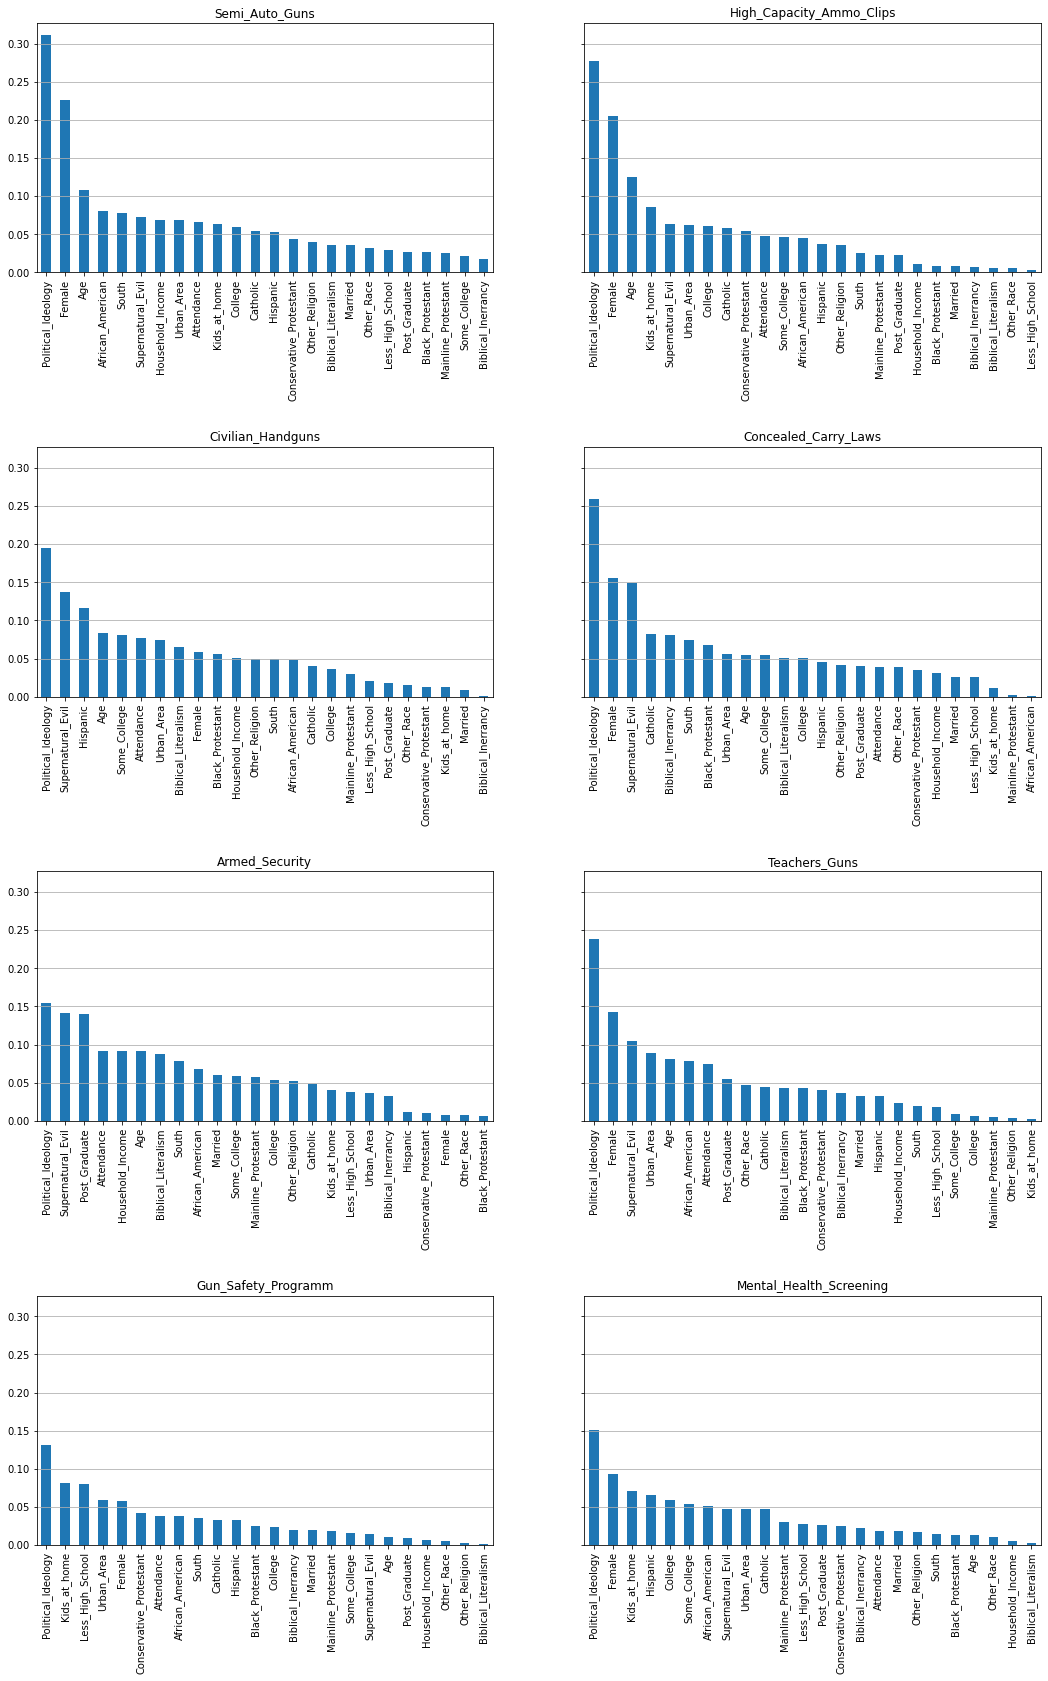

In [16]:
# Plotting // Model 2

sc1 = sc_2.abs().Semi_Auto_Guns.sort_values(ascending=False)
sc2 = sc_2.abs().High_Capacity_Ammo_Clips.sort_values(ascending=False)
sc3 = sc_2.abs().Civilian_Handguns.sort_values(ascending=False)
sc4 = sc_2.abs().Concealed_Carry_Laws.sort_values(ascending=False)
sc5 = sc_2.abs().Armed_Security.sort_values(ascending=False)
sc6 = sc_2.abs().Teachers_Guns.sort_values(ascending=False)
sc7 = sc_2.abs().Gun_Safety_Programm.sort_values(ascending=False)
sc8 = sc_2.abs().Mental_Health_Screening.sort_values(ascending=False)

%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(18,28))
fig.subplots_adjust(hspace = 0.7)

sc1.plot(kind='bar', ax=axes[0,0], title = 'Semi_Auto_Guns').grid(axis = 'y')
sc2.plot(kind='bar', ax=axes[0,1], title = 'High_Capacity_Ammo_Clips').grid(axis = 'y')
sc3.plot(kind='bar', ax=axes[1,0], title = 'Civilian_Handguns').grid(axis = 'y')
sc4.plot(kind='bar', ax=axes[1,1], title = 'Concealed_Carry_Laws').grid(axis = 'y')
sc5.plot(kind='bar', ax=axes[2,0], title = 'Armed_Security').grid(axis = 'y')
sc6.plot(kind='bar', ax=axes[2,1], title = 'Teachers_Guns').grid(axis = 'y')
sc7.plot(kind='bar', ax=axes[3,0], title = 'Gun_Safety_Programm').grid(axis = 'y')
sc8.plot(kind='bar', ax=axes[3,1], title = 'Mental_Health_Screening').grid(axis = 'y')

plt.show()

#### Results

In model 2, political ideology has the most strength in all occasions. Supernatural evil beliefs, age, gender and kids under 18 at home variables also consider critical for our model.

## Part 5: Compare with Decision Trees / Random Forest Estimators
---
Having worked with logistic and linear regression models, we will carry out predictions by using Decision Trees / Random Forests. Then, we will check if the predictors, primarily the belief in supernatural evil, make also a strong showing with the best model we have found. We will train our models with all available variables.

The steps we will follow are:
* Select parameters for Random Forest Classifier
* Run and fit the model to RF Classifier
* Check the accuracy of our model
* Find and plot the importance feature of each predictor



In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Semi Auto Weapon Ban

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.722 (0.019)

========== Importance Features ========== 

1. Variable 9 Political_Ideology (0.173213)
2. Variable 10 Age (0.154588)
3. Variable 11 Female (0.093143)
4. Variable 1 Attendance (0.084459)
5. Variable 19 Household_Income (0.080347)
6. Variable 0 Supernatural_Evil (0.048840)
7. Variable 22 Urban_Area (0.035380)
8. Variable 23 South (0.034780)
9. Variable 20 Married (0.028720)
10. Variable 16 Some_College (0.025697)
11. Variable 21 Kids_at_home (0.025145)
12. Variable 2 Biblical_Inerrancy (0.025005)
13. Variable 18 Post_Graduate (0.022807)
14. Variable 17 College (0.022504)
15. Variable 7 Catholic (0.020284)
16. Variable 3 Biblical_Literalism (0.019931)
17. Variable 4 Conservative_Protestant (0.019455)
18. Variable 12 Hispanic (0.017786)
19. Variable 5 Mainline_Protestant (0.014425)
20. Variable 13 African_American (0.013550)
21. Variable 8 Other_Religion (0.011979)
22. Variable 15 Less_High_School (0.01

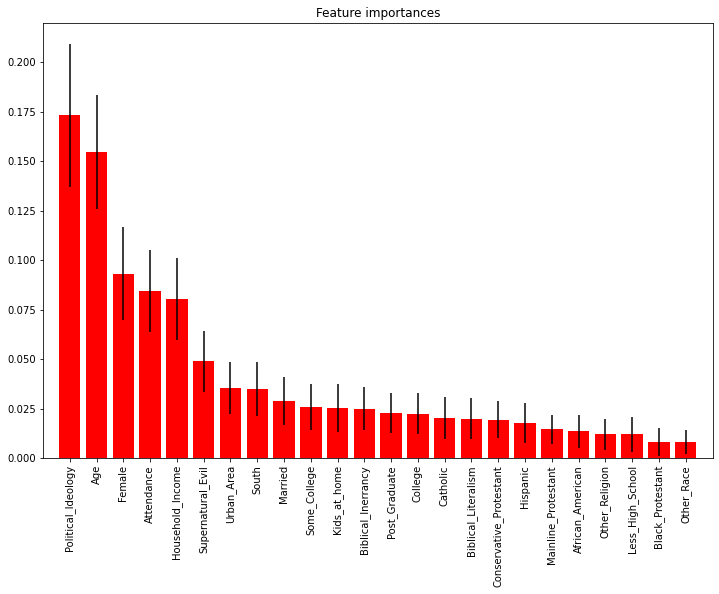

In [18]:
X = df1.loc[:,model_2].values
y = df1['Semi_Auto_Guns'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### High Capacity Magazine Ban

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.722 (0.010)

========== Importance Features ========== 

1. Variable 9 Political_Ideology (0.199602)
2. Variable 10 Age (0.171308)
3. Variable 11 Female (0.111735)
4. Variable 1 Attendance (0.075297)
5. Variable 19 Household_Income (0.068859)
6. Variable 0 Supernatural_Evil (0.047670)
7. Variable 21 Kids_at_home (0.037932)
8. Variable 22 Urban_Area (0.033745)
9. Variable 23 South (0.026355)
10. Variable 20 Married (0.023601)
11. Variable 17 College (0.021927)
12. Variable 16 Some_College (0.021556)
13. Variable 2 Biblical_Inerrancy (0.020994)
14. Variable 4 Conservative_Protestant (0.020215)
15. Variable 18 Post_Graduate (0.020199)
16. Variable 7 Catholic (0.019989)
17. Variable 3 Biblical_Literalism (0.018112)
18. Variable 12 Hispanic (0.014110)
19. Variable 13 African_American (0.011417)
20. Variable 5 Mainline_Protestant (0.011042)
21. Variable 8 Other_Religion (0.007468)
22. Variable 15 Less_High_School (0.00

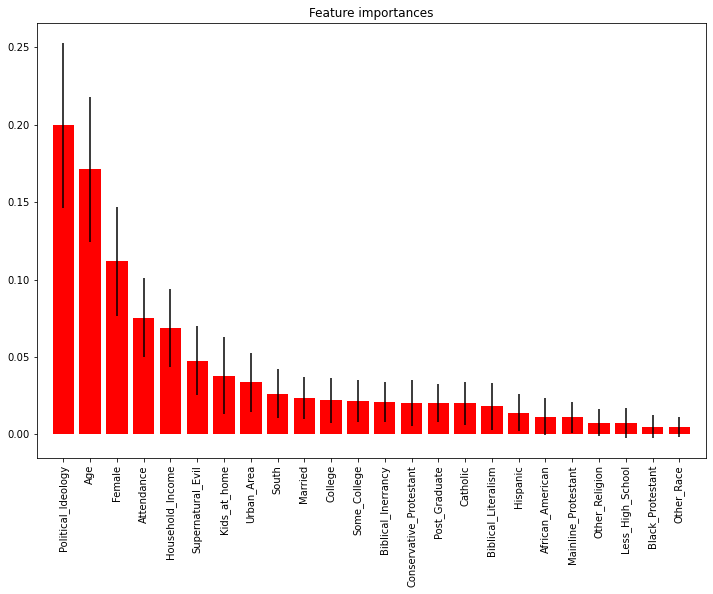

In [19]:
X = df2.loc[:,model_2].values
y = df2['High_Capacity_Ammo_Clips'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### Civilian Hand Gun Possession Ban

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.716 (0.009)

========== Importance Features ========== 

1. Variable 9 Political_Ideology (0.164088)
2. Variable 10 Age (0.145102)
3. Variable 19 Household_Income (0.091724)
4. Variable 1 Attendance (0.082983)
5. Variable 0 Supernatural_Evil (0.069942)
6. Variable 22 Urban_Area (0.041181)
7. Variable 12 Hispanic (0.033944)
8. Variable 11 Female (0.032896)
9. Variable 16 Some_College (0.030808)
10. Variable 20 Married (0.030428)
11. Variable 23 South (0.025637)
12. Variable 13 African_American (0.024642)
13. Variable 2 Biblical_Inerrancy (0.024540)
14. Variable 18 Post_Graduate (0.023715)
15. Variable 21 Kids_at_home (0.023370)
16. Variable 7 Catholic (0.023114)
17. Variable 4 Conservative_Protestant (0.022378)
18. Variable 17 College (0.021380)
19. Variable 6 Black_Protestant (0.020538)
20. Variable 3 Biblical_Literalism (0.017819)
21. Variable 8 Other_Religion (0.017316)
22. Variable 5 Mainline_Protestant (0.015

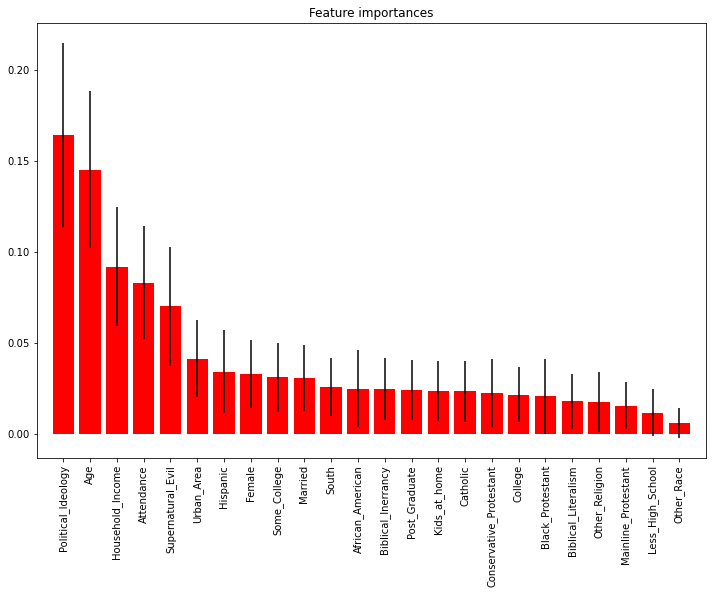

In [20]:
X = df3.loc[:,model_2].values
y = df3['Civilian_Handguns'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### Support for Concealed Carry

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.649 (0.020)

========== Importance Features ========== 

1. Variable 9 Political_Ideology (0.201811)
2. Variable 10 Age (0.142692)
3. Variable 1 Attendance (0.076427)
4. Variable 19 Household_Income (0.074940)
5. Variable 11 Female (0.074750)
6. Variable 0 Supernatural_Evil (0.065619)
7. Variable 22 Urban_Area (0.035890)
8. Variable 20 Married (0.035738)
9. Variable 23 South (0.032187)
10. Variable 18 Post_Graduate (0.031859)
11. Variable 16 Some_College (0.027928)
12. Variable 2 Biblical_Inerrancy (0.024912)
13. Variable 21 Kids_at_home (0.024896)
14. Variable 7 Catholic (0.022748)
15. Variable 4 Conservative_Protestant (0.021730)
16. Variable 17 College (0.019639)
17. Variable 3 Biblical_Literalism (0.016371)
18. Variable 13 African_American (0.013670)
19. Variable 12 Hispanic (0.013128)
20. Variable 5 Mainline_Protestant (0.011741)
21. Variable 6 Black_Protestant (0.009159)
22. Variable 8 Other_Religion (0.008

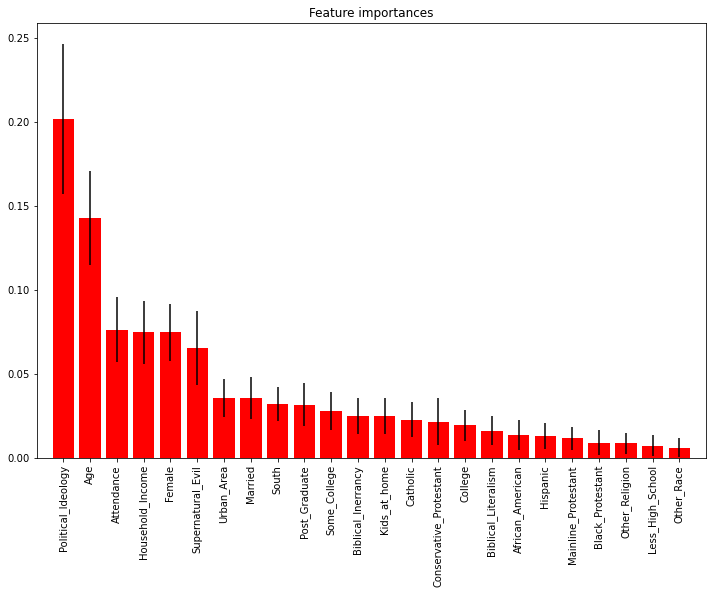

In [21]:
X = df4.loc[:,model_2].values
y = df4['Concealed_Carry_Laws'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### More Armed Security at Schools 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.686 (0.018)

========== Importance Features ========== 

1. Variable 10 Age (0.153308)
2. Variable 9 Political_Ideology (0.125870)
3. Variable 0 Supernatural_Evil (0.107025)
4. Variable 19 Household_Income (0.097284)
5. Variable 1 Attendance (0.085694)
6. Variable 18 Post_Graduate (0.043396)
7. Variable 23 South (0.036317)
8. Variable 3 Biblical_Literalism (0.034219)
9. Variable 22 Urban_Area (0.029636)
10. Variable 20 Married (0.027041)
11. Variable 11 Female (0.026036)
12. Variable 21 Kids_at_home (0.023656)
13. Variable 2 Biblical_Inerrancy (0.023618)
14. Variable 16 Some_College (0.020890)
15. Variable 7 Catholic (0.020556)
16. Variable 17 College (0.019535)
17. Variable 4 Conservative_Protestant (0.019481)
18. Variable 5 Mainline_Protestant (0.019299)
19. Variable 13 African_American (0.017689)
20. Variable 12 Hispanic (0.016557)
21. Variable 14 Other_Race (0.016036)
22. Variable 8 Other_Religion (0.015542)


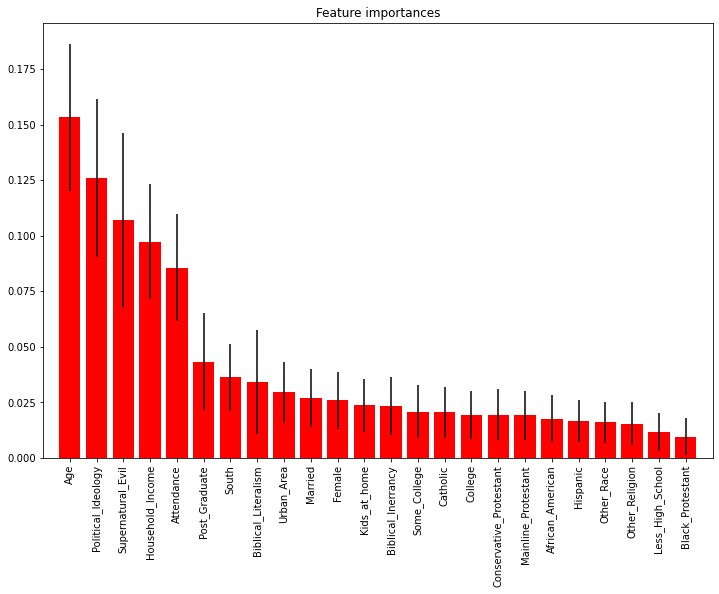

In [22]:
X = df5.loc[:,model_2].values
y = df5['Armed_Security'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### More Teachers/Faculty with Guns



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.719 (0.012)

========== Importance Features ========== 

1. Variable 10 Age (0.170303)
2. Variable 9 Political_Ideology (0.150018)
3. Variable 1 Attendance (0.094752)
4. Variable 19 Household_Income (0.085621)
5. Variable 0 Supernatural_Evil (0.057072)
6. Variable 11 Female (0.054288)
7. Variable 22 Urban_Area (0.041501)
8. Variable 23 South (0.032449)
9. Variable 20 Married (0.031625)
10. Variable 4 Conservative_Protestant (0.028571)
11. Variable 16 Some_College (0.028417)
12. Variable 2 Biblical_Inerrancy (0.028410)
13. Variable 21 Kids_at_home (0.026103)
14. Variable 17 College (0.024020)
15. Variable 18 Post_Graduate (0.022832)
16. Variable 7 Catholic (0.021744)
17. Variable 3 Biblical_Literalism (0.020561)
18. Variable 5 Mainline_Protestant (0.017551)
19. Variable 13 African_American (0.014649)
20. Variable 12 Hispanic (0.014059)
21. Variable 8 Other_Religion (0.009367)
22. Variable 15 Less_High_School (0.00

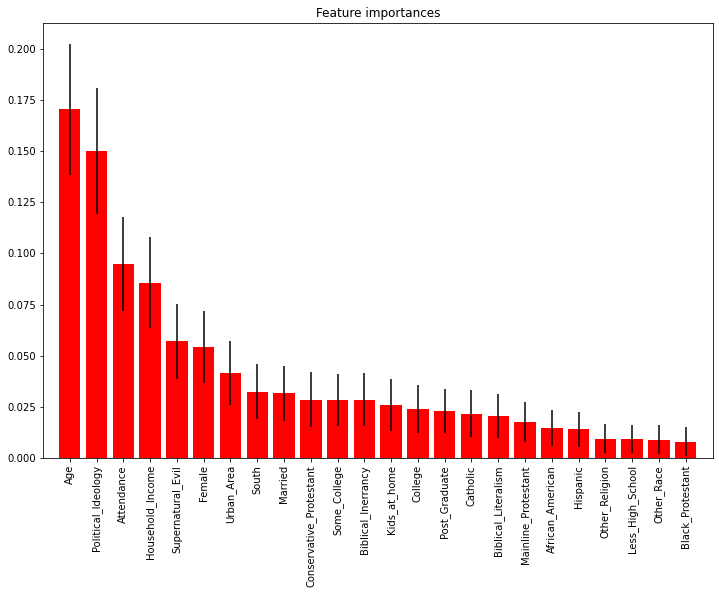

In [23]:
X = df6.loc[:,model_2].values
y = df6['Teachers_Guns'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)


### Required Gun Safety Programms


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.927 (0.000)

========== Importance Features ========== 

1. Variable 10 Age (0.189604)
2. Variable 9 Political_Ideology (0.110056)
3. Variable 1 Attendance (0.104748)
4. Variable 19 Household_Income (0.098416)
5. Variable 0 Supernatural_Evil (0.056087)
6. Variable 11 Female (0.033003)
7. Variable 22 Urban_Area (0.031825)
8. Variable 23 South (0.030940)
9. Variable 20 Married (0.029945)
10. Variable 17 College (0.029866)
11. Variable 16 Some_College (0.027618)
12. Variable 15 Less_High_School (0.027437)
13. Variable 7 Catholic (0.024482)
14. Variable 2 Biblical_Inerrancy (0.024251)
15. Variable 21 Kids_at_home (0.024043)
16. Variable 4 Conservative_Protestant (0.024001)
17. Variable 5 Mainline_Protestant (0.022959)
18. Variable 3 Biblical_Literalism (0.022286)
19. Variable 12 Hispanic (0.019386)
20. Variable 18 Post_Graduate (0.018536)
21. Variable 14 Other_Race (0.015056)
22. Variable 8 Other_Religion (0.013903)


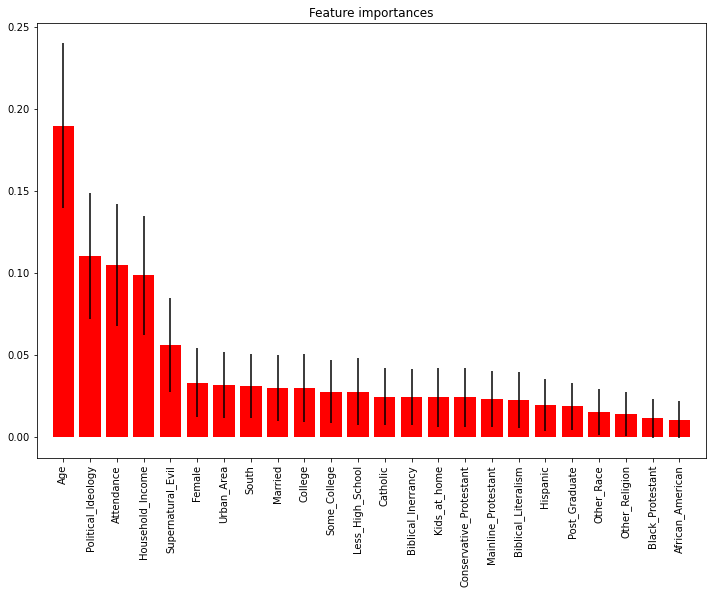

In [24]:
X = df7.loc[:,model_2].values
y = df7['Gun_Safety_Programm'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### Expanded Mental Health Screening

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy: 0.907 (0.003)

========== Importance Features ========== 

1. Variable 10 Age (0.191629)
2. Variable 9 Political_Ideology (0.124735)
3. Variable 19 Household_Income (0.100970)
4. Variable 1 Attendance (0.097241)
5. Variable 0 Supernatural_Evil (0.050985)
6. Variable 11 Female (0.043987)
7. Variable 20 Married (0.035716)
8. Variable 22 Urban_Area (0.032590)
9. Variable 23 South (0.031517)
10. Variable 16 Some_College (0.029670)
11. Variable 4 Conservative_Protestant (0.026684)
12. Variable 17 College (0.025857)
13. Variable 21 Kids_at_home (0.025410)
14. Variable 2 Biblical_Inerrancy (0.024916)
15. Variable 18 Post_Graduate (0.021684)
16. Variable 3 Biblical_Literalism (0.021331)
17. Variable 7 Catholic (0.020155)
18. Variable 5 Mainline_Protestant (0.020016)
19. Variable 14 Other_Race (0.017459)
20. Variable 12 Hispanic (0.015527)
21. Variable 8 Other_Religion (0.012723)
22. Variable 13 African_American (0.010993)


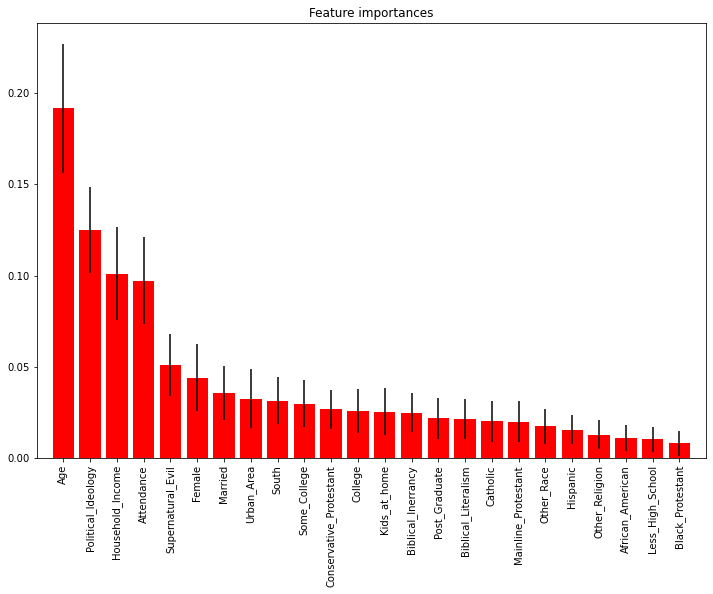

In [25]:
X = df8.loc[:,model_2].values
y = df8['Mental_Health_Screening'].values

#Step 1a (Selection of parameters to search for)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}   # Create the random grid

#Step 1b (Select best parameters)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

#Step 2 (Run Random Forest for best parameters)
best_model_random = rf_random.best_estimator_
best_model_random.fit(X,y)

#Step 3 (Evaluate model)
scores = cross_val_score(best_model_random, X, y, cv=5, scoring='accuracy')
print('='*23)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('='*23,'\n')

# Step 4 (Importance features)
importances = best_model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_random.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print('='*10,'Importance Features','='*10,'\n')
for f in range(X.shape[1]):
    print("%d. Variable %d %s (%f)" % (f + 1, indices[f], model_2[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the RF Classifier
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[model_2[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X.shape[1]])
g = plt.xticks(rotation=90)

### Conclusion

Our models score in accuracy between **0.65** and **0.93**. The best one is for *Gun Safety Programm* prediction and the worst one is the prediction for *Support for Concealed Carry*. 

The *belief in supernatural evil* is among the top five predictors in all models. Apart from the latest, also strong predictors are the *age*, *political ideology*, *gender*, *household income* and *attendance*.